# Clue Probabilities
The purpose of this notebook is to visualize the probability of answering a clue correct, given only the grid location of the clue. 

We do this by using NumPy arrays to represent every possible clue location and use for loops to count if the clue was answered correctly by any of the contestants. After finding the number of correctly answered clues in each clue location, we use another for loop to count the number of occurances of that clue location being chosen. We do this because time often runs out before all questions are answered correctly, so we cannot just divide the first array by number of games played.

In [1]:
# Import packages and read data
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
os.chdir('C:\\Users\\mhous\\scrap\\JeopardyProject')
clues = pd.read_csv('clues.csv')

In [2]:
# Subset the data to just the necessary columns
df = clues[['round', 'column', 'row', 'n_correct', 'n_incorrect']]
df.head()

,round,column,row,n_correct,n_incorrect
0,J,1.0,1.0,1,0
1,J,1.0,2.0,1,0
2,J,1.0,3.0,1,0
3,J,1.0,4.0,0,2
4,J,1.0,5.0,1,0


In [3]:
#Initialize empty arrays for number of correctly answered clues in the Jeopardy and Double Jeopardy rounds
array_J = np.zeros((5,6))
array_DJ = np.zeros((5,6))

In [4]:
# Use for loops to count the number of occurrences each clue location was answered correctly 
for i in range(len(df)):
    if (df.iloc[i]['round'] == 'J') & (df.iloc[i]['n_correct'] == 1):
            row = int(df.iloc[i]['row']) - 1
            col = int(df.iloc[i]['column']) - 1
            array_J[row][col] += 1
    elif (df.iloc[i]['round'] == 'DJ') & (df.iloc[i]['n_correct'] == 1):
            row = int(df.iloc[i]['row']) - 1
            col = int(df.iloc[i]['column']) -1
            array_DJ[row][col] +=1

In [5]:
# Initialize empty arrays for the number of occurrences each clue location was chosen
array_J_total = np.zeros((5,6))
array_DJ_total = np.zeros((5,6))

In [6]:
# Use for loops to count the number of occurrences each clue location was chosen
for i in range(len(df)):
    if (df.iloc[i]['round'] == 'J'):
            row = int(df.iloc[i]['row']) - 1
            col = int(df.iloc[i]['column']) - 1
            array_J_total[row][col] += 1
    elif (df.iloc[i]['round'] == 'DJ'):
            row = int(df.iloc[i]['row']) - 1
            col = int(df.iloc[i]['column']) -1
            array_DJ_total[row][col] +=1

In [7]:
# Divide the number of correctly answered clues by location by the number of clues by location for the Jeopardy and Double Jeopardy rounds
prob_array_J = 100 * array_J/array_J_total
prob_array_J = np.round(prob_array_J, 2)
print('Jeopardy Round:')
print(prob_array_J)

prob_array_DJ = 100 * array_DJ/array_DJ_total
prob_array_DJ = np.round(prob_array_DJ, 2)
print('\n\nDouble Jeopardy Round:')
print(prob_array_DJ)

Jeopardy Round:
[[96.   95.95 95.73 95.49 96.07 96.02]
 [91.15 91.78 92.29 91.94 91.47 93.02]
 [86.96 88.18 88.66 87.73 88.77 88.5 ]
 [81.43 83.66 83.8  83.83 85.15 85.74]
 [73.13 75.68 74.97 73.86 74.43 77.84]]


Double Jeopardy Round:
[[93.97 94.17 93.3  93.77 94.13 94.45]
 [86.33 88.86 87.87 88.35 87.9  89.56]
 [79.3  83.52 80.97 81.57 81.29 84.08]
 [73.19 75.92 73.86 74.87 74.16 77.86]
 [62.16 65.98 63.81 64.66 63.61 68.63]]


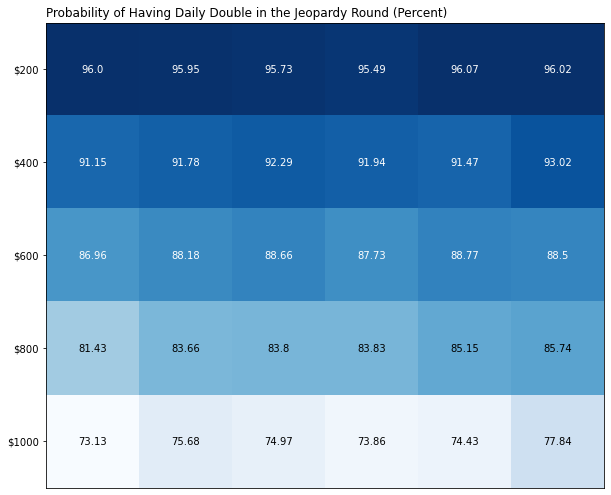

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(prob_array_J, cmap = 'Blues')
for i in range(5):
    for j in range(6):
        if prob_array_J[i, j] >= 86:
            text = ax.text(j, i, prob_array_J[i, j], ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, prob_array_J[i, j], ha="center", va="center", color="black")
plt.title('Probability of Having Daily Double in the Jeopardy Round (Percent)', loc='left')
ax.set_yticklabels(['', '$200', '$400', '$600', '$800', '$1000'])
plt.tick_params(axis='x', which='both',bottom=False, labelbottom=False)
plt.show()

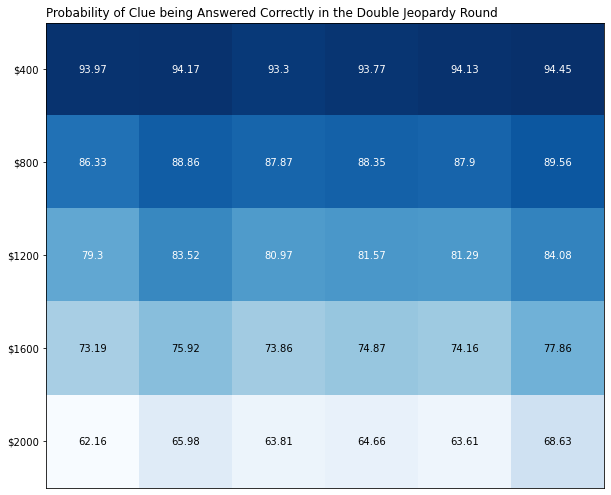

In [9]:
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(prob_array_DJ, cmap = 'Blues')
for i in range(5):
    for j in range(6):
        if prob_array_DJ[i, j] >= 78:
            text = ax.text(j, i, prob_array_DJ[i, j], ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, prob_array_DJ[i, j], ha="center", va="center", color="black")
plt.title('Probability of Clue being Answered Correctly in the Double Jeopardy Round', loc = 'left')
ax.set_yticklabels(['', '$400', '$800', '$1200', '$1600', '$2000'])
plt.tick_params(axis='x', which='both',bottom=False, labelbottom=False)
plt.show()

In [10]:
print('Probability Clue in Row X is Answered Correctly in the Jeopardy Round:')
for i in range(5):
    prob = prob_array_J.mean(axis=1)[i]
    print('Row ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Clue in Row X is Answered Correctly in the Jeopardy Round:
Row 1: 95.88
Row 2: 91.94
Row 3: 88.13
Row 4: 83.94
Row 5: 74.98


In [11]:
print('Probability Clue in Row X is Answered Correctly in the Double Jeopardy Round:')
for i in range(5):
    prob = prob_array_DJ.mean(axis=1)[i]
    print('Row ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Clue in Row X is Answered Correctly in the Double Jeopardy Round:
Row 1: 93.96
Row 2: 88.14
Row 3: 81.79
Row 4: 74.98
Row 5: 64.81


In [12]:
print('Probability Clue in Column X is Answered Correctly in the Jeopardy Round:')
for i in range(6):
    prob = prob_array_J.mean(axis=0)[i]
    print('Column ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Clue in Column X is Answered Correctly in the Jeopardy Round:
Column 1: 85.73
Column 2: 87.05
Column 3: 87.09
Column 4: 86.57
Column 5: 87.18
Column 6: 88.22


In [13]:
print('Probability Clue in Row X is Answered Correctly in the Double Jeopardy Round:')
for i in range(6):
    prob = prob_array_DJ.mean(axis=0)[i]
    print('Column ' + str(i+1) + ': ' + str(round(prob,2)))

Probability Clue in Row X is Answered Correctly in the Double Jeopardy Round:
Column 1: 78.99
Column 2: 81.69
Column 3: 79.96
Column 4: 80.64
Column 5: 80.22
Column 6: 82.92


In [14]:
FJ_correct = 0
FJ_contestants = 0
FJ = df[df['round'] == 'FJ']
for i in range(len(FJ)):
    FJ_correct += FJ.iloc[i]['n_correct']
    FJ_contestants += FJ.iloc[i]['n_correct'] + FJ.iloc[i]['n_incorrect']

### Final Jeopardy Statistics

In [15]:
print('Probability of Answering Final Jeopardy Correctly')
print(FJ_correct/FJ_contestants)

Probability of Answering Final Jeopardy Correctly
0.49250773011971777


In [16]:
print('Number of Correct Contestants in Final Jeopardy')
FJ.groupby(['n_correct'])['round'].count()

Number of Correct Contestants in Final Jeopardy


n_correct
0     874
1    1372
2    1262
3     772
Name: round, dtype: int64